# **Online sales in USA** #
## Exploratory Data Analysis ##

### **About the dataset**

Dataset of a Online Sales in USA is about the sales of different products, several merchandise and electronic in different states. Since a huge chunk of the people who have access to internet is switching to online shopping, large retailers are actively searching for ways to increase their profit. Sales analysis is one such key techniques used by large retailers to to increase sales by understanding the customers' purchasing behavior & patterns. Market basket analysis examines collections of items to find relationships between items that go together within the business context.

In [ ]:
import pandas as pd
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests


In [ ]:
!pip install pandas
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/open?id=1G0KdR1AxGkEAic-1VCaNi7NUK2YdkupQ'
fluff, id = link.split('=')
print (id)

1G0KdR1AxGkEAic-1VCaNi7NUK2YdkupQ


In [ ]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('sales.csv')
sales_df = pd.read_csv('sales.csv')

<ipython-input-5-7e11e29ef350>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv('sales.csv')


**Dimentions of The Dataset**

In [ ]:
sales_df.shape

(286392, 36)

In [ ]:
sales_df.head().T

,0,1,2,3,4
order_id,100354678,100354678,100354680,100354680,100367357
order_date,2020-10-01,2020-10-01,2020-10-01,2020-10-01,2020-11-13
status,received,received,complete,complete,received
item_id,574772.0,574774.0,574777.0,574779.0,595185.0
sku,oasis_Oasis-064-36,Fantastic_FT-48,mdeal_DMC-610-8,oasis_Oasis-061-36,MEFNAR59C38B6CA08CD
qty_ordered,21.0,11.0,9.0,9.0,2.0
price,89.9,19.0,149.9,79.9,99.9
value,1798.0,190.0,1199.2,639.2,99.9
discount_amount,0.0,0.0,0.0,0.0,0.0
total,1798.0,190.0,1199.2,639.2,99.9


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

**Renaming Columns**

In [ ]:
sales_df.rename(columns={'Name Prefix': 'Name_Prefix','First Name': 'First_Name','Middle Initial': 'Middle_Initial','Last Name': 'Last_Name','E Mail' : 'E_Mail','Customer Since' : 'Customer_Since','Phone No.' : 'Phone_No.','Place_Name' : 'Place_Name', 'User Name' : 'User_Name' }, inplace=True)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

**Checking Null Values**

In [ ]:
sales_df.isnull().sum()

**Correlation between each type of variable**

In [ ]:
correlation = sales_df.corr()

In [ ]:
sns.set(rc={"figure.figsize":(24, 8)})
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.show()

**Identify the number of unique records in each column**

In [ ]:
sales_df.nunique()

**Number of unique customers**

In [ ]:
unique_customers = sales_df.drop_duplicates('cust_id')
len(unique_customers)

There are 64248 unique customers in this dataset

**Customers by Gender**

In [ ]:
customer_count_by_gender = unique_customers.groupby('Gender').agg(Count = ('Gender','count'))
customer_count_by_gender

In [ ]:
plot1=unique_customers['Gender'].value_counts()/unique_customers['Gender'].count()*100  #neww
plot1

In [ ]:
plot1.plot.pie(autopct="%.1f%%"); #new

Among them 32011 are female and 32237 are male

**Customers by State**

In [ ]:
cust_state = sales_df.drop_duplicates('cust_id').groupby('State').agg(Count = ('State','count'))
cust_state = cust_state.reset_index()
cust_state

In [ ]:
usa_states = json.loads(requests.get('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json').text)

fig1 = px.choropleth_mapbox(cust_state, geojson=usa_states, locations=cust_state.index , color=cust_state.Count,
                           color_continuous_scale="Viridis",
                           range_color=(0, cust_state['Count'].max()),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5
                          )
fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig1.show()

In [ ]:
sns.set(rc={"figure.figsize":(24, 8)})
sns.countplot(x='State',data=unique_customers)

**Customers by Region**

In [ ]:
customer_count_in_each_region = unique_customers.groupby(['Region']).agg(customer_count = ('Region','count'))
customer_count_in_each_region

In [ ]:
customer_count_in_each_region = customer_count_in_each_region.reset_index()
sns.barplot(x = 'Region', y = 'customer_count', hue = 'Region',data = customer_count_in_each_region )

**Age of Customers**

In [ ]:
sns.distplot(unique_customers['age'],bins = 10)



**Average customer age in each category**

In [ ]:
sales_df[["category","age"]].groupby('category').mean()

In [ ]:
sns.boxplot(y=unique_customers.category,x=unique_customers.age)

**Order Count by order status**

In [ ]:
order_status = sales_df['status'].unique()
print(order_status)

In [ ]:
sns.set(rc={"figure.figsize":(24, 8)})
sns.countplot(x='status',data=sales_df)

**Orders from each category**

In [ ]:
order_category_count = sales_df.groupby(['category']).agg(Order_count = ('category','count'))
order_category_count

In [ ]:
sns.countplot(x='category',data=sales_df)
plt.xticks(rotation=75)
plt.show()

**Orders from each category group by order status**

In [ ]:
order_status_count = sales_df.groupby(['category','status']).agg(Order_count = ('status','count'))
order_status_count

In [ ]:
cross_tab1 = pd.crosstab(index=sales_df['category'],
                        columns=sales_df['status'])
cross_tab1

In [ ]:
cross_tab_prop1 = pd.crosstab(index=sales_df['category'],
                             columns=sales_df['status'],
                             normalize="index")
cross_tab_prop1

In [ ]:
sns.countplot(x='status', hue='category', data=sales_df)

**Age distribution for completed orders**

In [ ]:
order_completed = sales_df.loc[(sales_df['status'] == 'complete')]

In [ ]:
sns.boxplot(y='category', x='age', data = order_completed)

**Transactions by Payment Methods for completed orders**

In [ ]:
trasaction_count = order_completed.groupby('payment_method').agg(trans_count = ('payment_method','count'))
trasaction_count.sort_values(by = 'trans_count',ascending=False)

**Sales In Each State**

In [ ]:
sales_for_state = sales_df.groupby(['State']).agg({'total':'sum'})
sales_for_state = sales_for_state.reset_index()
sales_for_state.sort_values(by= 'total', ascending=False)

In [ ]:
usa_states = json.loads(requests.get('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json').text)

fig = px.choropleth_mapbox(sales_for_state, geojson=usa_states, locations=sales_for_state.index , color=sales_for_state['total'],
                           color_continuous_scale="Viridis",
                           range_color=(0, sales_for_state['total'].max()),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Months during which sales are at their peak**

In [ ]:
sales_for_months = sales_df.groupby(['order_date']).agg({'total':'sum'})
sales_for_months.reset_index(inplace=True)
sales_for_months['order_date'] = pd.to_datetime(sales_for_months['order_date'])
sales_for_months = sales_for_months.sort_values(by='order_date').reset_index(drop=True)
plt.figure(figsize = (20,5))

plt.title('Month-Year vs Sales')
plt.plot(sales_for_months['order_date'],sales_for_months['total'], c = 'b')
plt.xticks(rotation = 45)
plt.show()

**Total discount given for each category with order status**

In [ ]:
total_discount_by_category = sales_df.groupby(['category','status']).agg(tot_discount = ('discount_amount','sum'),no_of_orders =('status','count') )
total_discount_by_category

In [ ]:
total_discount_by_category = total_discount_by_category.reset_index()
sns.barplot(x=total_discount_by_category.category, y=total_discount_by_category.tot_discount, data=total_discount_by_category)

<Axes: xlabel='category', ylabel='tot_discount'>

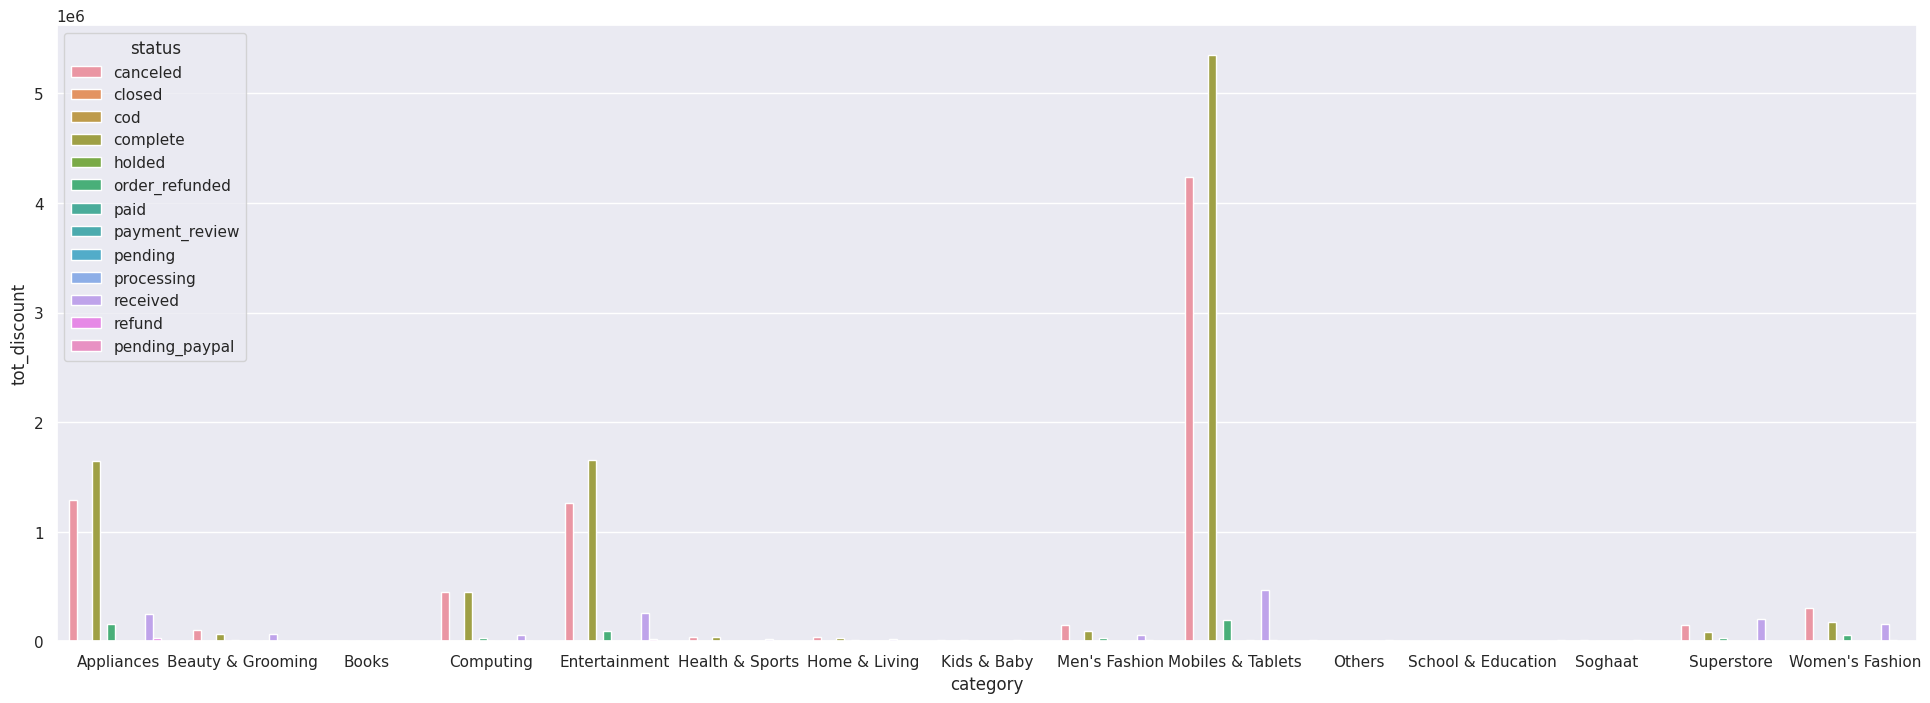

In [ ]:
sns.barplot(x='category', y='tot_discount',hue = 'status', data=total_discount_by_category)

**Customers who responded to the discounts**

In [ ]:
sales_df_discount = sales_df[sales_df['discount_amount'] > 0]
len(sales_df_discount['cust_id'].unique())

17567

No.of customers who responded to the discounts = 17567

In [ ]:
percentage1 = (17567/64248) * 100
print(percentage1)

27.34248536919437


Among all customers 27.34% responded to discounts




**No.of customers who completed the orders out of the ones who got the discounts**

In [ ]:
sales_df_order_completed = sales_df_discount[(sales_df_discount['status'] == 'complete')]
no_Customers = sales_df_order_completed['cust_id'].nunique()
print(no_Customers)

10500


No.of customers who got discount and completed the order = 10500

In [ ]:
percentage2 = (10500/17567) * 100
print(percentage2)

59.77116183753629


59.77% are completed orders who got discount



## Insight into revenue with regard to the appliances, gender, and geo-locations

*Regard to Gender*

In [ ]:
sales_by_gender = sales_df.groupby(['Gender']).agg({'total':'sum'})
sales_by_gender

,total
Gender,
F,1.166528e+08
M,1.169974e+08


*Regard to geo location*

In [ ]:
sales_for_state.sort_values(by = 'total', ascending=False,inplace=False)

,State,total
43,TX,1.546746e+07
4,CA,1.387618e+07
34,NY,1.136510e+07
38,PA,1.015904e+07
14,IL,9.106895e+06
9,FL,8.459037e+06
45,VA,8.193937e+06
35,OH,8.147443e+06
24,MO,8.000870e+06
17,KY,6.994809e+06


*Top 10 States*

In [ ]:
top_ten_states = sales_for_state.nlargest(10, 'total')
top_ten_states

,State,total
43,TX,1.546746e+07
4,CA,1.387618e+07
34,NY,1.136510e+07
38,PA,1.015904e+07
14,IL,9.106895e+06
9,FL,8.459037e+06
45,VA,8.193937e+06
35,OH,8.147443e+06
24,MO,8.000870e+06
17,KY,6.994809e+06


*Top 10 cities*

In [ ]:
trans_by_city = sales_df.groupby('City').agg({'total':'sum'})
top_ten_cities = trans_by_city.nlargest(10, 'total')
top_ten_cities

,total
City,
Noxapater,1.909972e+06
Dennis,1.630642e+06
Goodland,1.582634e+06
New Hyde Park,1.413711e+06
Washington,1.371721e+06
West Rutland,1.310392e+06
Houston,1.087900e+06
Baring,1.075098e+06
Springfield,9.410421e+05


*Regard to age group*

In [ ]:
customers_by_age_group = sales_df
age_groups = ['<20', '20-30', '30-40', '40-50', '50-60','60-70','70-80','80+']
customers_by_age_group['age_group']  = pd.cut(sales_df['age'],bins = [0, 20, 30, 40, 50, 60,70,80,100], labels=age_groups)


In [ ]:
sales_by_age_group = customers_by_age_group.groupby(['age_group']).agg({'total':'sum'})
sales_by_age_group.sort_values(by='total',ascending=False)

,total
age_group,
30-40,4.531973e+07
60-70,4.154601e+07
20-30,3.961754e+07
50-60,3.890252e+07
40-50,3.799069e+07
70-80,1.904478e+07
<20,1.122892e+07
80+,0.000000e+00


## **Completed and Cancelled Transactions with regard to Appliances Gender and Geo-locations**





*Completed and Cancelled Transactions with regard to Appliances*

In [ ]:
new_df=customers_by_age_group[["cust_id","category","Gender","age_group","status","City","State","Region","County"]]
print(new_df)

         cust_id           category Gender age_group      status  \
0        60124.0      Men's Fashion      F     40-50    received   
1        60124.0      Men's Fashion      F     40-50    received   
2        60124.0      Men's Fashion      F     40-50    complete   
3        60124.0      Men's Fashion      F     40-50    complete   
4        60124.0      Men's Fashion      F     40-50    received   
...          ...                ...    ...       ...         ...   
286387  115323.0         Appliances      M     50-60        paid   
286388  115324.0      Men's Fashion      M     50-60         cod   
286389  115325.0    Women's Fashion      F     30-40         cod   
286390  115325.0    Women's Fashion      F     30-40         cod   
286391  115326.0  Mobiles & Tablets      M     20-30  processing   

                 City State     Region    County  
0              Vinson    OK      South    Harmon  
1              Vinson    OK      South    Harmon  
2              Vinson    OK   

In [ ]:
new_df.drop(new_df.index[(new_df["status"] == "closed")],axis=0,inplace=True)
new_df.drop(new_df.index[(new_df["status"] == "cod")],axis=0,inplace=True)
new_df.drop(new_df.index[(new_df["status"] == "holded")],axis=0,inplace=True)
new_df.drop(new_df.index[(new_df["status"] == "order_refunded")],axis=0,inplace=True)
new_df.drop(new_df.index[(new_df["status"] == "paid")],axis=0,inplace=True)
new_df.drop(new_df.index[(new_df["status"] == "payment_review")],axis=0,inplace=True)
new_df.drop(new_df.index[(new_df["status"] == "pending")],axis=0,inplace=True)
new_df.drop(new_df.index[(new_df["status"] == "pending_paypal")],axis=0,inplace=True)
new_df.drop(new_df.index[(new_df["status"] == "processing")],axis=0,inplace=True)
new_df.drop(new_df.index[(new_df["status"] == "received")],axis=0,inplace=True)
new_df.drop(new_df.index[(new_df["status"] == "refund")],axis=0,inplace=True)

<ipython-input-54-aa70642535bf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-aa70642535bf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-aa70642535bf>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-aa70642535bf>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
new_df.groupby("status").count()

,cust_id,category,Gender,age_group,City,State,Region,County
status,,,,,,,,
canceled,112166,112166,112166,112166,112166,112166,112166,112166
complete,88968,88968,88968,88968,88968,88968,88968,88968


In [ ]:
order_status_count_by_cat = new_df.groupby(['category','status']).agg(Order_count = ('status','count'))
order_status_count_by_cat

Order_count
category           status               
Appliances         canceled        13559
                   complete        12648
Beauty & Grooming  canceled         5025
                   complete         5983
Books              canceled          126
                   complete          226
Computing          canceled         3561
                   complete         2536
Entertainment      canceled         7661
                   complete         6535
Health & Sports    canceled         1478
                   complete         2809
Home & Living      canceled         4095
                   complete         4434
Kids & Baby        canceled         1908
                   complete         1838
Men's Fashion      canceled        11342
                   complete        14697
Mobiles & Tablets  canceled        30271
                   complete        20295
Others             canceled        17312
                   complete         1813
School & Education canceled          328
                   complete          220
Soghaat            canceled         2536
                   complete         2096
Superstore         canceled         4760
                   complete         4170
Women's Fashion    canceled         8204
                   complete         8668

In [ ]:
cross_tab1 = pd.crosstab(index=new_df['category'],
                        columns=new_df['status'])
cross_tab1

status,canceled,complete
category,,
Appliances,13559,12648
Beauty & Grooming,5025,5983
Books,126,226
Computing,3561,2536
Entertainment,7661,6535
Health & Sports,1478,2809
Home & Living,4095,4434
Kids & Baby,1908,1838
Men's Fashion,11342,14697


In [ ]:
cross_tab_prop1 = pd.crosstab(index=new_df['category'],
                             columns=new_df['status'],
                             normalize="index")
cross_tab_prop1

status,canceled,complete
category,,
Appliances,0.517381,0.482619
Beauty & Grooming,0.456486,0.543514
Books,0.357955,0.642045
Computing,0.584058,0.415942
Entertainment,0.539659,0.460341
Health & Sports,0.344763,0.655237
Home & Living,0.480127,0.519873
Kids & Baby,0.509343,0.490657
Men's Fashion,0.435577,0.564423


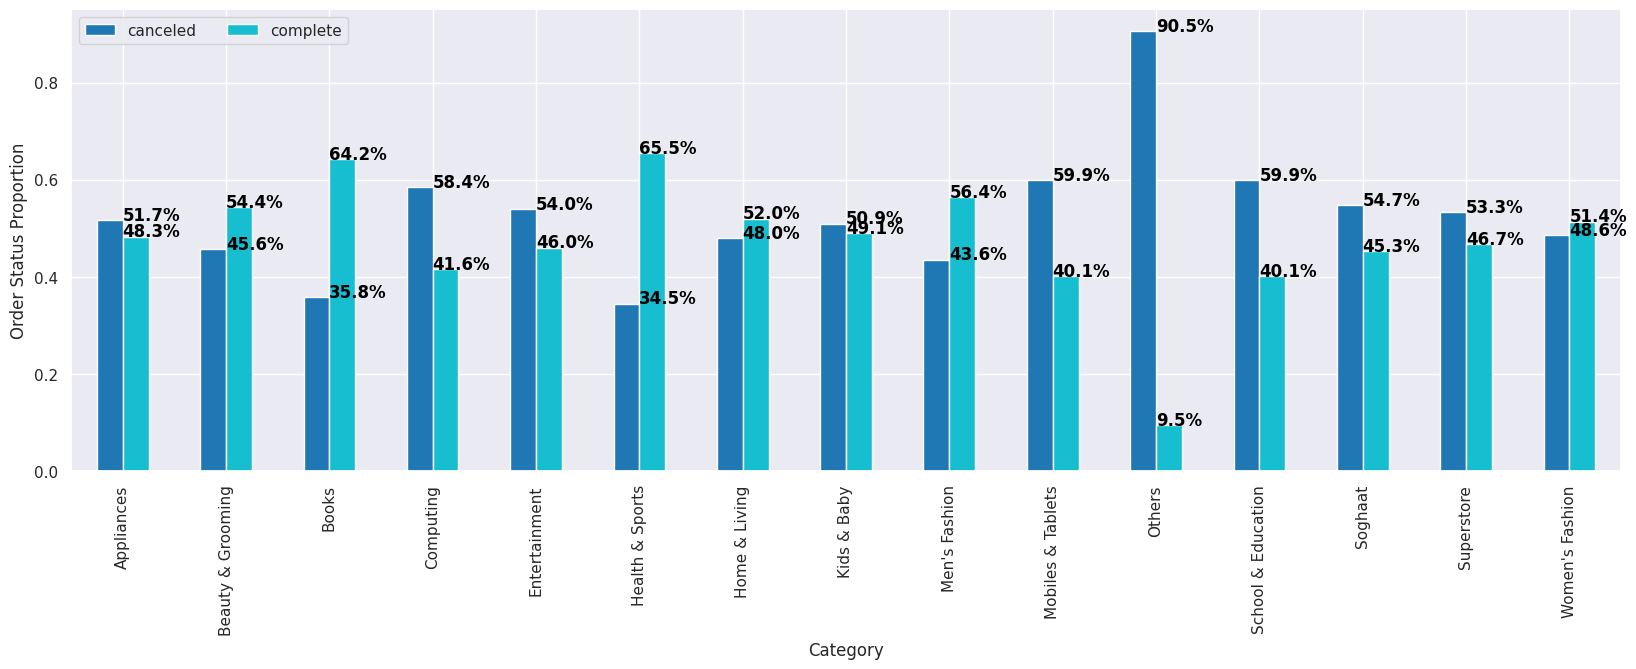

In [ ]:
cross_tab_prop1.plot(kind='bar',
                    stacked=False,
                    colormap='tab10',
                    figsize=(20, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Category")
plt.ylabel("Order Status Proportion")


for n, x in enumerate([*cross_tab1.index.values]):
    for proportion in cross_tab_prop1.loc[x]:

        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

*Completed and Cancelled transactions with regard to Gender*

In [ ]:
Gender_status_count = new_df.groupby(['Gender','status']).agg(Order_count = ('status','count'))
Gender_status_count

Order_count
Gender status               
F      canceled        55654
       complete        43981
M      canceled        56512
       complete        44987

In [ ]:
cross_tab2 = pd.crosstab(index=new_df['Gender'],
                        columns=new_df['status'])
cross_tab2

status,canceled,complete
Gender,,
F,55654,43981
M,56512,44987


In [ ]:
cross_tab_prop2 = pd.crosstab(index=new_df['Gender'],
                             columns=new_df['status'],
                             normalize="index")
cross_tab_prop2

status,canceled,complete
Gender,,
F,0.558579,0.441421
M,0.556774,0.443226


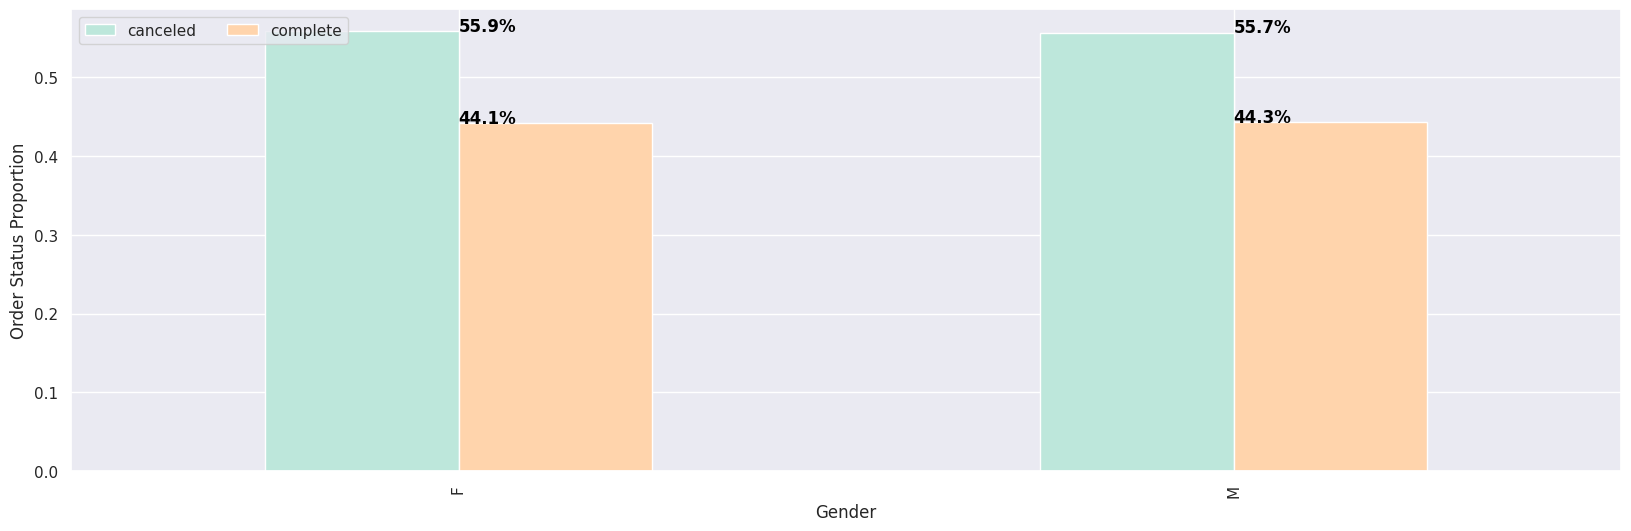

In [ ]:
cross_tab_prop2.plot(kind='bar',
                    stacked=False,
                    colormap='icefire',
                    figsize=(20, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Order Status Proportion")


for n, x in enumerate([*cross_tab2.index.values]):
    for proportion in cross_tab_prop2.loc[x]:

        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

*Completed and Cancelled transactions with regard to Region*

In [ ]:
Region_status_count = new_df.groupby(['Region','status']).agg(Order_count = ('status','count'))
Region_status_count

Order_count
Region    status               
Midwest   canceled        31004
          complete        25187
Northeast canceled        19934
          complete        15604
South     canceled        40929
          complete        32316
West      canceled        20299
          complete        15861

In [ ]:
cross_tab3 = pd.crosstab(index=new_df['Gender'],
                        columns=new_df['status'])

cross_tab_prop3 = pd.crosstab(index=new_df['Gender'],
                             columns=new_df['status'],
                             normalize="index")
cross_tab_prop3.plot(kind='bar',
                    stacked=False,
                    colormap='crest',
                    figsize=(20, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Order Status Proportion")


for n, x in enumerate([*cross_tab3.index.values]):
    for proportion in cross_tab_prop3.loc[x]:

        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

*Completed and Cancelled transactions with regard to Age groups*

In [ ]:
transactions_by_age_group = new_df.groupby(['age_group','status']).agg(Order_count = ('status','count'))
display(transactions_by_age_group)

In [ ]:
cross_tab4 = pd.crosstab(index=new_df['age_group'],
                        columns=new_df['status'])

cross_tab_prop4 = pd.crosstab(index=new_df['age_group'],
                             columns=new_df['status'],
                             normalize="index")

cross_tab_prop4.plot(kind='bar',
                    stacked=False,
                    colormap='icefire',
                    figsize=(20, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Order Status Proportion")


for n, x in enumerate([*cross_tab4.index.values]):
    for proportion in cross_tab_prop4.loc[x]:

        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

*Completed and Cancelled transactions with regard to County*

In [ ]:
transactions_by_county = new_df.groupby(['County','status']).agg(Order_count = ('status','count'))
display(transactions_by_county)


In [ ]:
cross_tab5 = pd.crosstab(index=new_df['County'],
                        columns=new_df['status'])

cross_tab_prop5 = pd.crosstab(index=new_df['County'],
                             columns=new_df['status'],
                             normalize="index")

cross_tab_prop5

status,canceled,complete
County,,
Aaron,1.000000,0.000000
Abbeville,0.666667,0.333333
Acadia,0.367347,0.632653
Accomack,0.550661,0.449339
Ada,0.767760,0.232240
...,...,...
Zeona,0.500000,0.500000
Zephyrhills,0.727273,0.272727
Ziebach,0.500000,0.500000


*Completed and Cancelled transactions with regard to City*

In [ ]:
transactions_by_city = new_df.groupby(['City','status']).agg(Order_count = ('status','count'))
display(transactions_by_city)

Order_count
City       status               
Aaron      canceled            1
Aaronsburg canceled            5
           complete            1
Abbeville  canceled            9
           complete           15
...                          ...
Zuni       canceled            7
           complete            3
Zwingle    canceled           12
           complete            1
Zwolle     complete            8

[23074 rows x 1 columns]

*TOP 10 Cities by cancellation of Orders*

In [ ]:
new_df1=new_df.drop(new_df.index[(new_df["status"] == "complete")],axis=0,inplace=False)

In [ ]:
transactions_by_city_cancelled = new_df1.groupby(['City','status']).agg(Order_count = ('status','count'))
display(transactions_by_city_cancelled)

,,Order_count
City,status,
Aaron,canceled,1
Aaronsburg,canceled,5
Abbeville,canceled,9
Abbotsford,canceled,3
Abbottstown,canceled,1
...,...,...
Zortman,canceled,2
Zullinger,canceled,1
Zumbro Falls,canceled,5


In [ ]:
top_ten_cities_by_cancelled = transactions_by_city_cancelled.nlargest(10, 'Order_count')
top_ten_cities_by_cancelled

,,Order_count
City,status,
Washington,canceled,764
Kittanning,canceled,692
Sedgwick,canceled,591
New York City,canceled,552
Houston,canceled,452
El Paso,canceled,425
Tornillo,canceled,421
Atlanta,canceled,394
Dallas,canceled,394


*TOP 10 Cities by Completion of Orders*

In [ ]:
new_df2=new_df.drop(new_df.index[(new_df["status"] == "canceled")],axis=0,inplace=False)

In [ ]:
transactions_by_city_completed = new_df2.groupby(['City','status']).agg(Order_count = ('status','count'))
display(transactions_by_city_completed)

,,Order_count
City,status,
Aaronsburg,complete,1
Abbeville,complete,15
Abbotsford,complete,2
Abbott,complete,8
Abbottstown,complete,1
...,...,...
Zortman,complete,7
Zumbro Falls,complete,8
Zuni,complete,3


In [ ]:
top_ten_cities_by_completed = transactions_by_city_completed.nlargest(10, 'Order_count')
top_ten_cities_by_completed

,,Order_count
City,status,
Dekalb,complete,864
Washington,complete,576
Houston,complete,449
New York City,complete,384
Atlanta,complete,326
El Paso,complete,298
Charlotte,complete,271
Columbus,complete,270
Springfield,complete,234


## Insight into discounts and offers with regard to the appliances, gender, and geo-locations

**Unique Customer count who recieved Discount by Gender**

In [ ]:
dis_count = sales_df.drop_duplicates('cust_id').loc[(sales_df.drop_duplicates('cust_id')['discount_amount'] > 0) ]
dis_count

In [ ]:
discount_recieved_by_gender = dis_count.groupby(['Gender']).agg({'cust_id':'count'})
discount_recieved_by_gender

**Order count which recieved Discount by Gender**

In [ ]:
dis_count_all = sales_df.loc[(sales_df['discount_amount'] > 0) ]
dis_count_all

In [ ]:
dis_recieved_order_count_by_gender = dis_count_all.groupby(['Gender']).agg({'cust_id':'count'})
dis_recieved_order_count_by_gender

**Discounts total received by Gender**

In [ ]:
dis_total_by_gender = sales_df.groupby(['Gender']).agg({'discount_amount':'sum'})
dis_total_by_gender

**Discount recieved by Age groups**

In [ ]:
customers_by_age_group = sales_df
age_groups = ['<20', '20-30', '30-40', '40-50', '50-60','60-70','70-80','80+']
customers_by_age_group['age_group']  = pd.cut(sales_df['age'],bins = [0, 20, 30, 40, 50, 60,70,80,100], labels=age_groups)

In [ ]:
discounts_recieved_by_age_group = customers_by_age_group.groupby(['age_group']).agg({'discount_amount':'sum'})
discounts_recieved_by_age_group.sort_values(by='discount_amount',ascending=False)

**Top 10 states which recieved discounts**

In [ ]:
dis_state = sales_df.groupby('State').agg(Amount = ('discount_amount','sum'))
dis_state
top_ten_states = dis_state.nlargest(10, 'Amount')
top_ten_states

**Discounts received by Regions**

In [ ]:
dis_region = sales_df.groupby('Region').agg(Amount = ('discount_amount','sum'))
dis_region.sort_values(by='Amount',ascending=False)

**Discount recieved by top 10 cities**

In [ ]:
dis_city = sales_df.groupby('City').agg(Amount = ('discount_amount','sum'))
dis_city
top_ten_cities = dis_city.nlargest(10, 'Amount')
top_ten_cities

**Discount count by Category**

In [ ]:
dis_count_by_category = sales_df.groupby(['category']).agg(Count = ('cust_id','count'))
dis_count_by_category.sort_values(by = ['Count'], ascending=False)

**Discount Amount by Category**

In [ ]:
dis_amount_by_category = sales_df.groupby(['category']).agg(Amount = ('discount_amount','sum'))
dis_amount_by_category.sort_values(by='Amount',ascending=False)

In [ ]:
filename = 'sales_df.xlsx'
sales_df.to_excel(filename, index=False)